In [1]:
from google.colab import drive  # to mount Drive to Colab notebook
import csv
import time
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Connect Google Drive to Colab
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
def train(X,y):
  modelo = MLPClassifier(random_state=0,verbose=3)
  step = 5000
  
  for i in range(0,len(X),step):
    modelo = modelo.partial_fit(X[i:i+step],y[i:i+step],classes=["fake","noFake"])
    if i%1000==0:
      print(f'Avance: {(i+1)*100/X.shape[0]} %')
  return modelo

# Cargamos muestras

## Muestra 1


In [ ]:
from sklearn.externals import joblib
%time X1_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_train.joblib')
%time X1_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_test.joblib')
#%time X1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_val.joblib')
#%time y1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_val.joblib')
%time y1_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_train.joblib')
%time y1_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_test.joblib')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


CPU times: user 8.63 s, sys: 103 ms, total: 8.73 s
Wall time: 10.7 s
CPU times: user 8.78 s, sys: 81 ms, total: 8.87 s
Wall time: 9.33 s
CPU times: user 7.59 ms, sys: 2.09 ms, total: 9.68 ms
Wall time: 362 ms
CPU times: user 4.64 ms, sys: 990 µs, total: 5.63 ms
Wall time: 494 ms


In [ ]:
%time modelo1 = train(X1_train,y1_train)


Iteration 1, loss = 0.69265002
Avance: 0.0013593051232210095 %
Iteration 2, loss = 0.61949310
Avance: 6.797884921228268 %
Iteration 3, loss = 0.53463762
Avance: 13.594410537333316 %
Iteration 4, loss = 0.44648250
Avance: 20.39093615343836 %
Iteration 5, loss = 0.38133038
Avance: 27.18746176954341 %
Iteration 6, loss = 0.35125140
Avance: 33.983987385648454 %
Iteration 7, loss = 0.30489044
Avance: 40.780513001753505 %
Iteration 8, loss = 0.29322908
Avance: 47.57703861785855 %
Iteration 9, loss = 0.27763372
Avance: 54.3735642339636 %
Iteration 10, loss = 0.26726012
Avance: 61.17008985006864 %
Iteration 11, loss = 0.25075775
Avance: 67.96661546617369 %
Iteration 12, loss = 0.25244129
Avance: 74.76314108227874 %
Iteration 13, loss = 0.24190037
Avance: 81.55966669838378 %
Iteration 14, loss = 0.22762107
Avance: 88.35619231448884 %
Iteration 15, loss = 0.21111810
Avance: 95.15271793059388 %
CPU times: user 3min 46s, sys: 1min 1s, total: 4min 47s
Wall time: 3min 5s


In [ ]:
joblib.dump(modelo1, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloMLPerceptron_m1.joblib')

['/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloMLPerceptron_m1.joblib']

In [ ]:
%time predictions1 = modelo1.predict(X1_test)

CPU times: user 13.7 s, sys: 2.32 s, total: 16 s
Wall time: 6.23 s


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y1_test, predictions1)
print(f"acc: {accuracy_score(y1_test,predictions1)}")
print(f"precision: {precision_score(y1_test,predictions1,average='macro')}")
print(f"recall: {recall_score(y1_test,predictions1,average='macro')}")
print(f"f1: {f1_score(y1_test,predictions1,average='micro')}")

acc: 0.9149671730787529
precision: 0.9139030906168413
recall: 0.909795509960837
f1: 0.9149671730787529


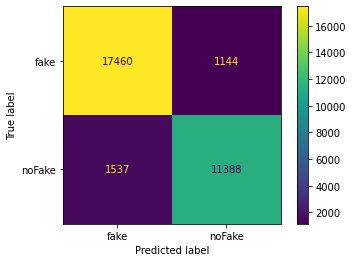

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion_display = ConfusionMatrixDisplay(res,display_labels=['fake','noFake']).plot(values_format='d')

## Muestra 2


In [ ]:
from sklearn.externals import joblib
%time X2_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X2_train.joblib')
%time X2_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X2_test.joblib')
#%time X1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_val.joblib')
#%time y1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_val.joblib')
%time y2_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y2_train.joblib')
%time y2_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y2_test.joblib')

CPU times: user 9.13 s, sys: 84.2 ms, total: 9.21 s
Wall time: 9.51 s
CPU times: user 8.62 s, sys: 80.3 ms, total: 8.7 s
Wall time: 8.99 s
CPU times: user 8.03 ms, sys: 1.77 ms, total: 9.8 ms
Wall time: 376 ms
CPU times: user 2.56 ms, sys: 2.9 ms, total: 5.45 ms
Wall time: 418 ms


In [ ]:
%time modelo2 = train(X2_train,y2_train)


Iteration 1, loss = 0.69164420
Avance: 0.0013593051232210095 %
Iteration 2, loss = 0.61689774
Avance: 6.797884921228268 %
Iteration 3, loss = 0.53084317
Avance: 13.594410537333316 %
Iteration 4, loss = 0.44769169
Avance: 20.39093615343836 %
Iteration 5, loss = 0.38808117
Avance: 27.18746176954341 %
Iteration 6, loss = 0.34592405
Avance: 33.983987385648454 %
Iteration 7, loss = 0.30934031
Avance: 40.780513001753505 %
Iteration 8, loss = 0.28915528
Avance: 47.57703861785855 %
Iteration 9, loss = 0.26850523
Avance: 54.3735642339636 %
Iteration 10, loss = 0.26856545
Avance: 61.17008985006864 %
Iteration 11, loss = 0.25490922
Avance: 67.96661546617369 %
Iteration 12, loss = 0.23147543
Avance: 74.76314108227874 %
Iteration 13, loss = 0.22973961
Avance: 81.55966669838378 %
Iteration 14, loss = 0.23970642
Avance: 88.35619231448884 %
Iteration 15, loss = 0.24681607
Avance: 95.15271793059388 %
CPU times: user 3min 49s, sys: 1min 4s, total: 4min 53s
Wall time: 3min 9s


In [ ]:
joblib.dump(modelo2, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloMLPerceptron_m2.joblib')

['/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloMLPerceptron_m2.joblib']

In [ ]:
%time predictions2 = modelo2.predict(X2_test)

CPU times: user 14.2 s, sys: 2.37 s, total: 16.5 s
Wall time: 6.07 s


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res2 = confusion_matrix(y2_test, predictions2)
print(f"acc: {accuracy_score(y2_test,predictions2)}")
print(f"precision: {precision_score(y2_test,predictions2,average='macro')}")
print(f"recall: {recall_score(y2_test,predictions2,average='macro')}")
print(f"f1: {f1_score(y2_test,predictions2,average='micro')}")

acc: 0.9142376859399283
precision: 0.9120005498725008
recall: 0.9104409026656358
f1: 0.9142376859399282


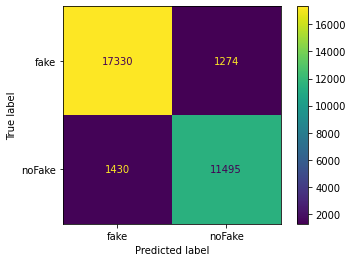

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion_display = ConfusionMatrixDisplay(res2,display_labels=['fake','noFake']).plot(values_format='d')

## Muestra 3


In [ ]:
from sklearn.externals import joblib
%time X3_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X3_train.joblib')
%time X3_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X3_test.joblib')
#%time X1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_val.joblib')
#%time y1_val = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_val.joblib')
%time y3_train = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y3_train.joblib')
%time y3_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y3_test.joblib')

CPU times: user 9.1 s, sys: 101 ms, total: 9.2 s
Wall time: 9.52 s
CPU times: user 8.74 s, sys: 71.3 ms, total: 8.81 s
Wall time: 9.14 s
CPU times: user 9.59 ms, sys: 70 µs, total: 9.66 ms
Wall time: 353 ms
CPU times: user 5.63 ms, sys: 0 ns, total: 5.63 ms
Wall time: 359 ms


In [ ]:
%time modelo3 = train(X3_train,y3_train)


Iteration 1, loss = 0.69243866
Avance: 0.0013593051232210095 %
Iteration 2, loss = 0.62068692
Avance: 6.797884921228268 %
Iteration 3, loss = 0.52608737
Avance: 13.594410537333316 %
Iteration 4, loss = 0.45002051
Avance: 20.39093615343836 %
Iteration 5, loss = 0.38606164
Avance: 27.18746176954341 %
Iteration 6, loss = 0.33775531
Avance: 33.983987385648454 %
Iteration 7, loss = 0.30245805
Avance: 40.780513001753505 %
Iteration 8, loss = 0.28392743
Avance: 47.57703861785855 %
Iteration 9, loss = 0.27618193
Avance: 54.3735642339636 %
Iteration 10, loss = 0.27435082
Avance: 61.17008985006864 %
Iteration 11, loss = 0.26221687
Avance: 67.96661546617369 %
Iteration 12, loss = 0.24578064
Avance: 74.76314108227874 %
Iteration 13, loss = 0.22869440
Avance: 81.55966669838378 %
Iteration 14, loss = 0.22869619
Avance: 88.35619231448884 %
Iteration 15, loss = 0.22884885
Avance: 95.15271793059388 %
CPU times: user 3min 48s, sys: 59 s, total: 4min 47s
Wall time: 3min 5s


In [ ]:
joblib.dump(modelo3, '/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloMLPerceptron_m3.joblib')

['/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloMLPerceptron_m3.joblib']

In [ ]:
%time predictions3 = modelo3.predict(X3_test)

CPU times: user 14.1 s, sys: 1.58 s, total: 15.7 s
Wall time: 5.82 s


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res3 = confusion_matrix(y3_test, predictions3)
print(f"acc: {accuracy_score(y3_test,predictions3)}")
print(f"precision: {precision_score(y3_test,predictions3,average='macro')}")
print(f"recall: {recall_score(y3_test,predictions3,average='macro')}")
print(f"f1: {f1_score(y3_test,predictions3,average='micro')}")

acc: 0.9156649433854547
precision: 0.9129108257404195
recall: 0.9127249188731277
f1: 0.9156649433854547


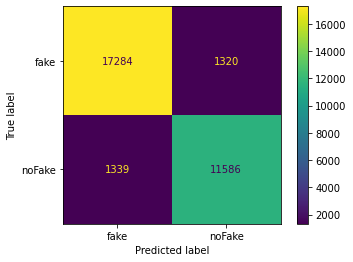

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion_display = ConfusionMatrixDisplay(res3,display_labels=['fake','noFake']).plot(values_format='d')

# Modelo 1 Aplicado a otras muestras


In [3]:
import joblib
modelo1 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos//modeloMLPerceptron_m1.joblib')


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator MLPClassifier from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [4]:
%time X1_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X1_test.joblib')
%time y1_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y1_test.joblib')
%time X2_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X2_test.joblib')
%time y2_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y2_test.joblib')
%time X3_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_X3_test.joblib')
%time y3_test = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/gossipcop_y3_test.joblib')

CPU times: user 5.63 s, sys: 238 ms, total: 5.86 s
Wall time: 6.01 s
CPU times: user 6.09 ms, sys: 0 ns, total: 6.09 ms
Wall time: 242 ms
CPU times: user 5.71 s, sys: 228 ms, total: 5.94 s
Wall time: 6.06 s
CPU times: user 5.3 ms, sys: 901 µs, total: 6.2 ms
Wall time: 224 ms
CPU times: user 5.69 s, sys: 182 ms, total: 5.87 s
Wall time: 6.05 s
CPU times: user 6.55 ms, sys: 2.04 ms, total: 8.59 ms
Wall time: 234 ms


In [5]:
%time predictions1 = modelo1.predict(X1_test)
%time predictions2 = modelo1.predict(X2_test)
%time predictions3 = modelo1.predict(X3_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


CPU times: user 1.43 s, sys: 20.5 ms, total: 1.45 s
Wall time: 1.44 s
CPU times: user 1.75 s, sys: 372 ms, total: 2.12 s
Wall time: 1.76 s
CPU times: user 1.63 s, sys: 356 ms, total: 1.98 s
Wall time: 1.61 s


In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res1 = confusion_matrix(y1_test, predictions1)
res2 = confusion_matrix(y2_test, predictions2)
res3 = confusion_matrix(y3_test, predictions3)
print(f"acc: {round(accuracy_score(y1_test,predictions1),3)} | {round(accuracy_score(y2_test,predictions2),3)} | {round(accuracy_score(y3_test,predictions3),3)}")
print(f"precision: {round(precision_score(y1_test,predictions1,average='macro'),3)} | {round(precision_score(y2_test,predictions2,average='macro'),3)} | {round(precision_score(y3_test,predictions3,average='macro'),3)} ")
print(f"recall: {round(recall_score(y1_test,predictions1,average='macro'),3)} | {round(recall_score(y2_test,predictions2,average='macro'),3)} | {round(recall_score(y3_test,predictions3,average='macro'),3)}  ")
print(f"f1: {round(f1_score(y1_test,predictions1,average='micro'),3)} | {round(f1_score(y2_test,predictions2,average='micro'),3)} | {round(f1_score(y3_test,predictions3,average='micro'),3)}  ")

acc: 0.915 | 0.917 | 0.918
precision: 0.914 | 0.916 | 0.917 
recall: 0.91 | 0.912 | 0.913  
f1: 0.915 | 0.917 | 0.918  


# Modelo 2 Aplicado a otras muestras


In [7]:
modelo2 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloMLPerceptron_m2.joblib')


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator MLPClassifier from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [8]:
%time predictions1 = modelo2.predict(X1_test)
%time predictions2 = modelo2.predict(X2_test)
%time predictions3 = modelo2.predict(X3_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


CPU times: user 525 ms, sys: 30.9 ms, total: 555 ms
Wall time: 540 ms
CPU times: user 625 ms, sys: 323 ms, total: 948 ms
Wall time: 589 ms
CPU times: user 655 ms, sys: 307 ms, total: 962 ms
Wall time: 602 ms


In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res1 = confusion_matrix(y1_test, predictions1)
res2 = confusion_matrix(y2_test, predictions2)
res3 = confusion_matrix(y3_test, predictions3)
print(f"acc: {round(accuracy_score(y1_test,predictions1),3)} | {round(accuracy_score(y2_test,predictions2),3)} | {round(accuracy_score(y3_test,predictions3),3)}")
print(f"precision: {round(precision_score(y1_test,predictions1,average='macro'),3)} | {round(precision_score(y2_test,predictions2,average='macro'),3)} | {round(precision_score(y3_test,predictions3,average='macro'),3)} ")
print(f"recall: {round(recall_score(y1_test,predictions1,average='macro'),3)} | {round(recall_score(y2_test,predictions2,average='macro'),3)} | {round(recall_score(y3_test,predictions3,average='macro'),3)}  ")
print(f"f1: {round(f1_score(y1_test,predictions1,average='micro'),3)} | {round(f1_score(y2_test,predictions2,average='micro'),3)} | {round(f1_score(y3_test,predictions3,average='micro'),3)}  ")

acc: 0.919 | 0.914 | 0.919
precision: 0.917 | 0.912 | 0.917 
recall: 0.915 | 0.91 | 0.916  
f1: 0.919 | 0.914 | 0.919  


# Modelo 3 Aplicado a otras muestras


In [10]:
modelo3 = joblib.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modeloMLPerceptron_m3.joblib')


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator MLPClassifier from version 0.22.2.post1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [11]:
%time predictions1 = modelo3.predict(X1_test)
%time predictions2 = modelo3.predict(X2_test)
%time predictions3 = modelo3.predict(X3_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


CPU times: user 571 ms, sys: 27.5 ms, total: 598 ms
Wall time: 587 ms
CPU times: user 657 ms, sys: 200 ms, total: 857 ms
Wall time: 640 ms
CPU times: user 637 ms, sys: 170 ms, total: 807 ms
Wall time: 616 ms


In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
res1 = confusion_matrix(y1_test, predictions1)
res2 = confusion_matrix(y2_test, predictions2)
res3 = confusion_matrix(y3_test, predictions3)
print(f"acc: {round(accuracy_score(y1_test,predictions1),3)} | {round(accuracy_score(y2_test,predictions2),3)} | {round(accuracy_score(y3_test,predictions3),3)}")
print(f"precision: {round(precision_score(y1_test,predictions1,average='macro'),3)} | {round(precision_score(y2_test,predictions2,average='macro'),3)} | {round(precision_score(y3_test,predictions3,average='macro'),3)} ")
print(f"recall: {round(recall_score(y1_test,predictions1,average='macro'),3)} | {round(recall_score(y2_test,predictions2,average='macro'),3)} | {round(recall_score(y3_test,predictions3,average='macro'),3)}  ")
print(f"f1: {round(f1_score(y1_test,predictions1,average='micro'),3)} | {round(f1_score(y2_test,predictions2,average='micro'),3)} | {round(f1_score(y3_test,predictions3,average='micro'),3)}  ")

acc: 0.922 | 0.92 | 0.916
precision: 0.919 | 0.917 | 0.913 
recall: 0.919 | 0.917 | 0.913  
f1: 0.922 | 0.92 | 0.916  
